In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/content/train_LZdllcl.csv")

In [3]:
df_test = pd.read_csv("/content/test_2umaH9m.csv")

In [4]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
df_train.shape

(54808, 14)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
df_train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [11]:
df_train.duplicated().sum()

np.int64(0)

# EDA

In [12]:
df_train.drop('employee_id',axis=1,inplace=True)
df_test.drop('employee_id', axis=1, inplace=True)

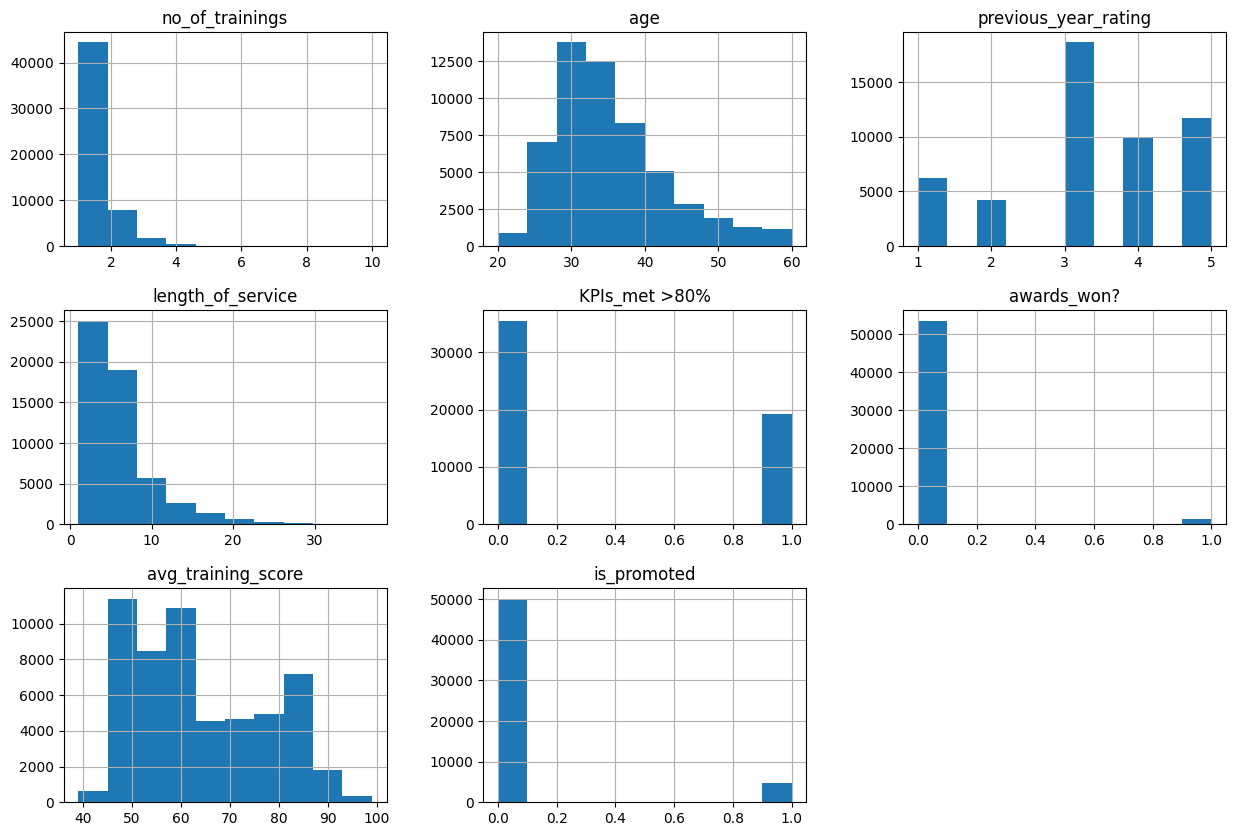

In [13]:
#distribution of numerical columns-

df_train.hist(figsize=(15,10))
plt.show()

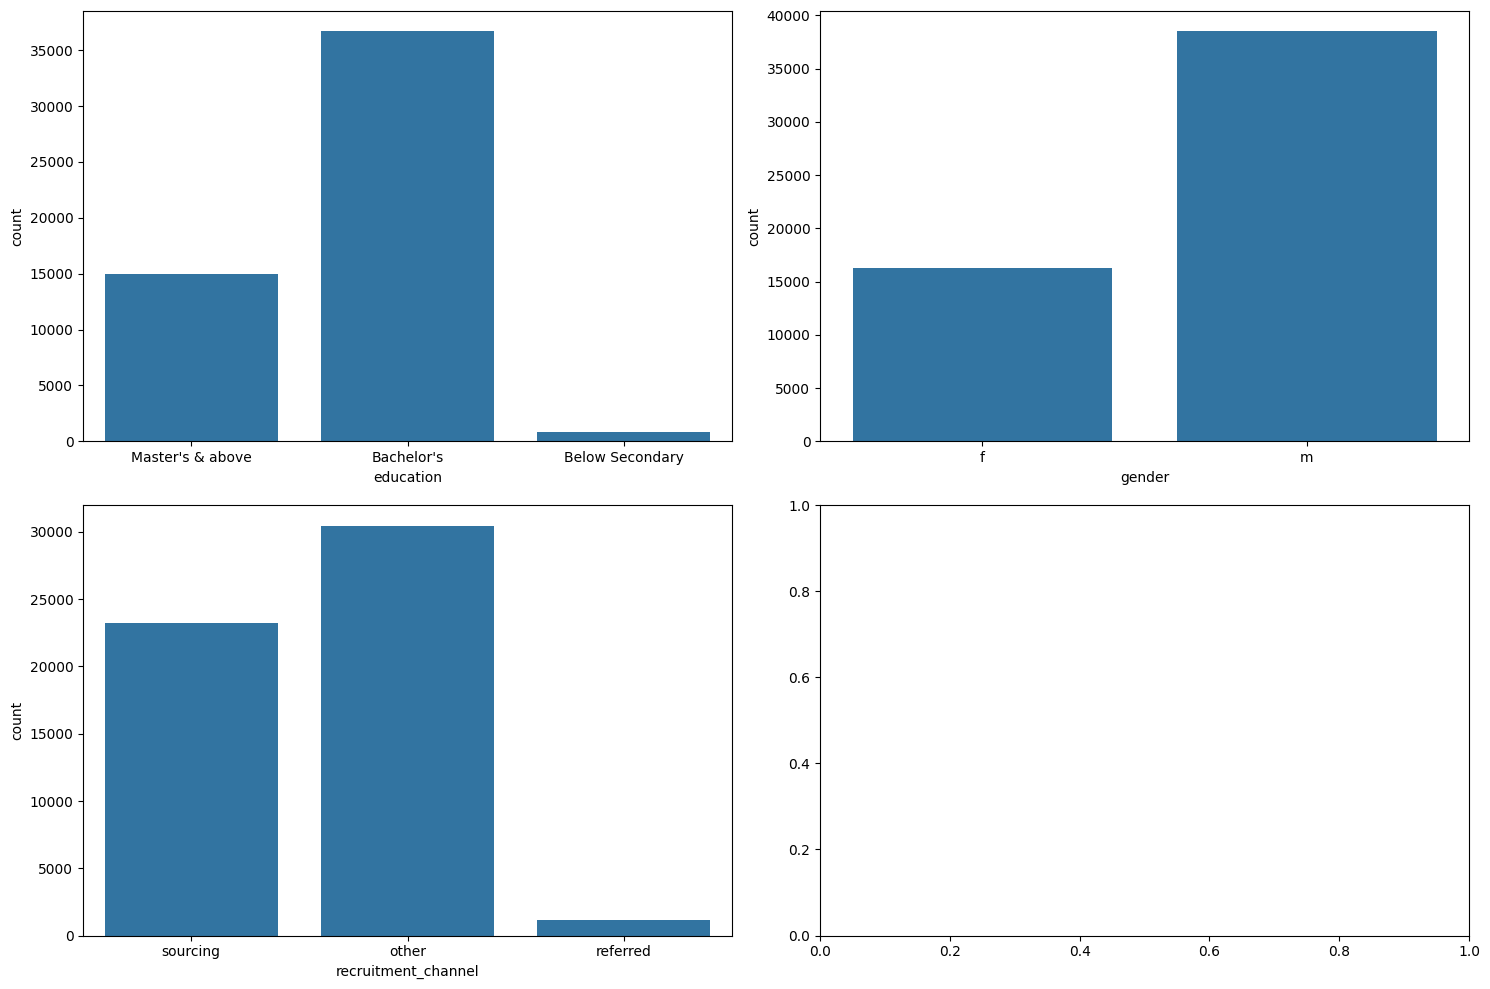

In [14]:
categ_columns = [ 'education', 'gender',
       'recruitment_channel']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(categ_columns):
    sns.countplot(x=col, data=df_train, ax=axes[i])

plt.tight_layout()
plt.show()

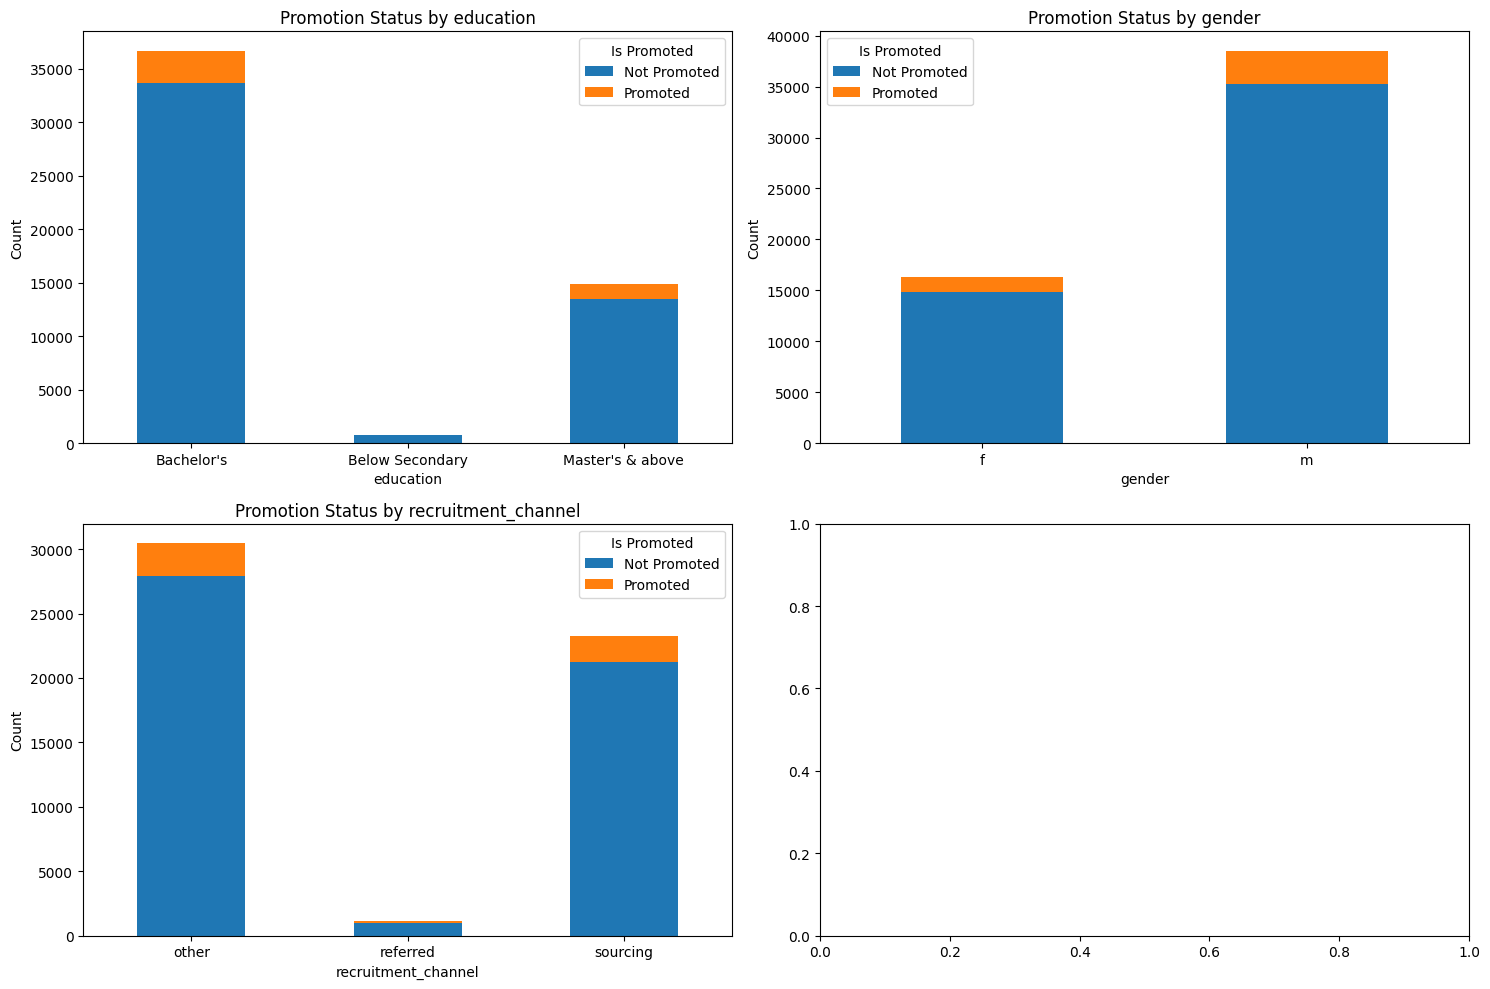

In [15]:
categ_columns = [ 'education', 'gender',
       'recruitment_channel']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()


for i, col in enumerate(categ_columns):
    stacked_data = pd.crosstab(df_train[col], df_train['is_promoted'])

    # Plotting the stacked bar chart on the current subplot
    stacked_data.plot(kind='bar', stacked=True, ax=axes[i], rot=0)

    axes[i].set_title(f'Promotion Status by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Is Promoted', labels=['Not Promoted', 'Promoted'])


plt.tight_layout()
plt.show()

<Axes: xlabel='department', ylabel='count'>

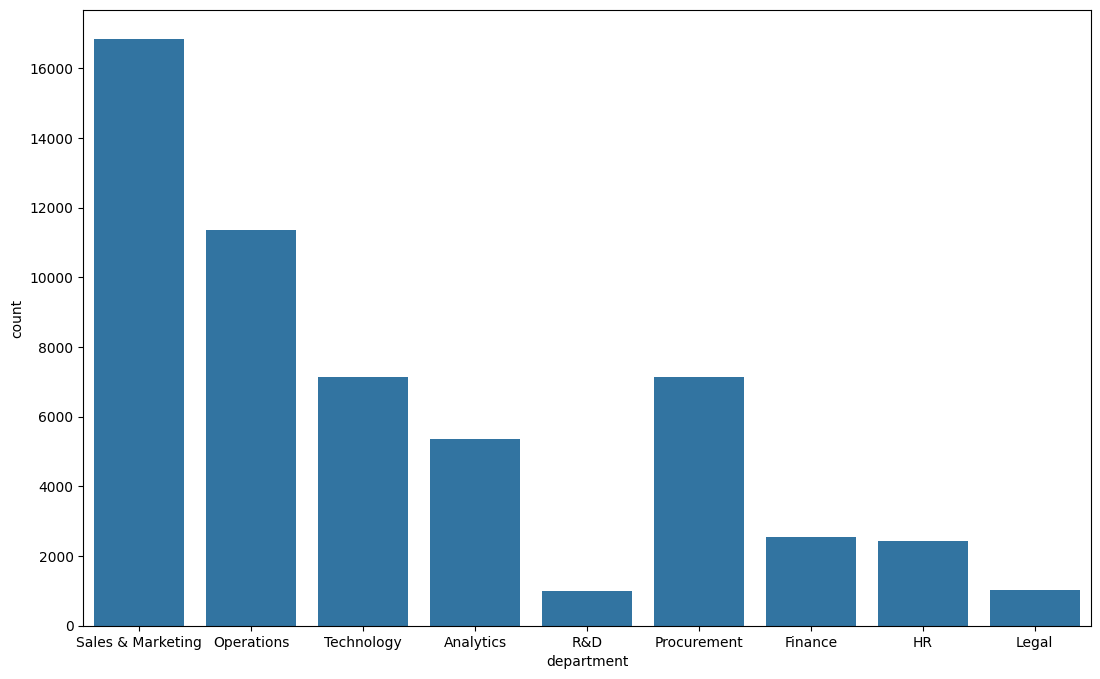

In [16]:
plt.figure(figsize=(13,8))
sns.countplot(x='department', data=df_train)

In [17]:
#sns.pairplot(data=df_train)

<ipython-input-18-57170807ad39>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='awards_won?', y='is_promoted', data=df_train, palette='viridis')


<Axes: xlabel='awards_won?', ylabel='is_promoted'>

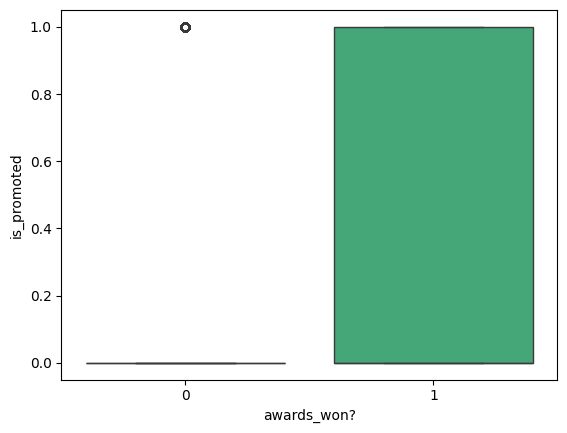

In [18]:
sns.boxplot(x='awards_won?', y='is_promoted', data=df_train, palette='viridis')

<ipython-input-19-45feaabe7346>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='length_of_service', y='is_promoted', data=df_train, palette='viridis')


<Axes: xlabel='length_of_service', ylabel='is_promoted'>

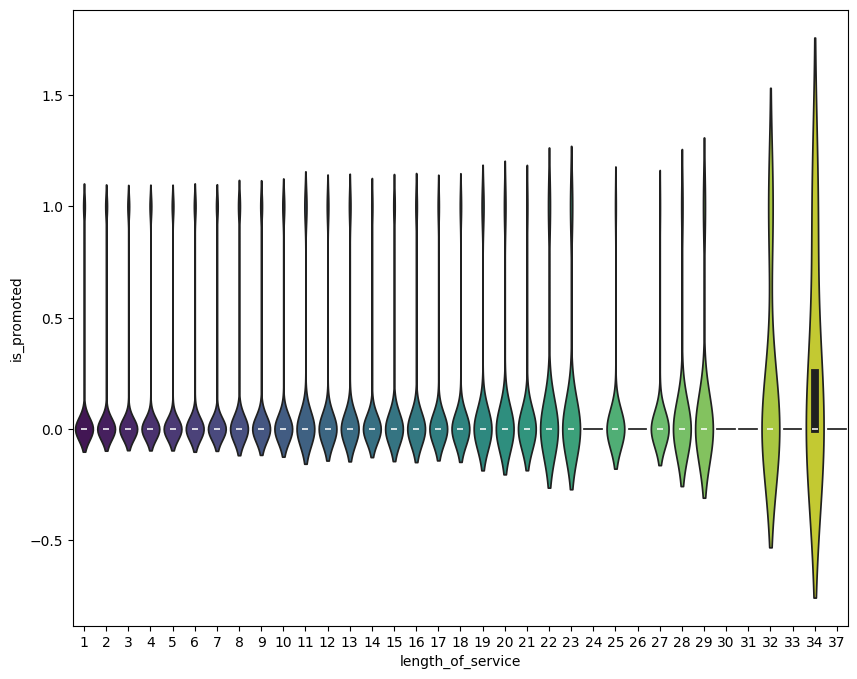

In [19]:
plt.figure(figsize=(10, 8)) # Adjust figure size as needed

sns.violinplot(x='length_of_service', y='is_promoted', data=df_train, palette='viridis')

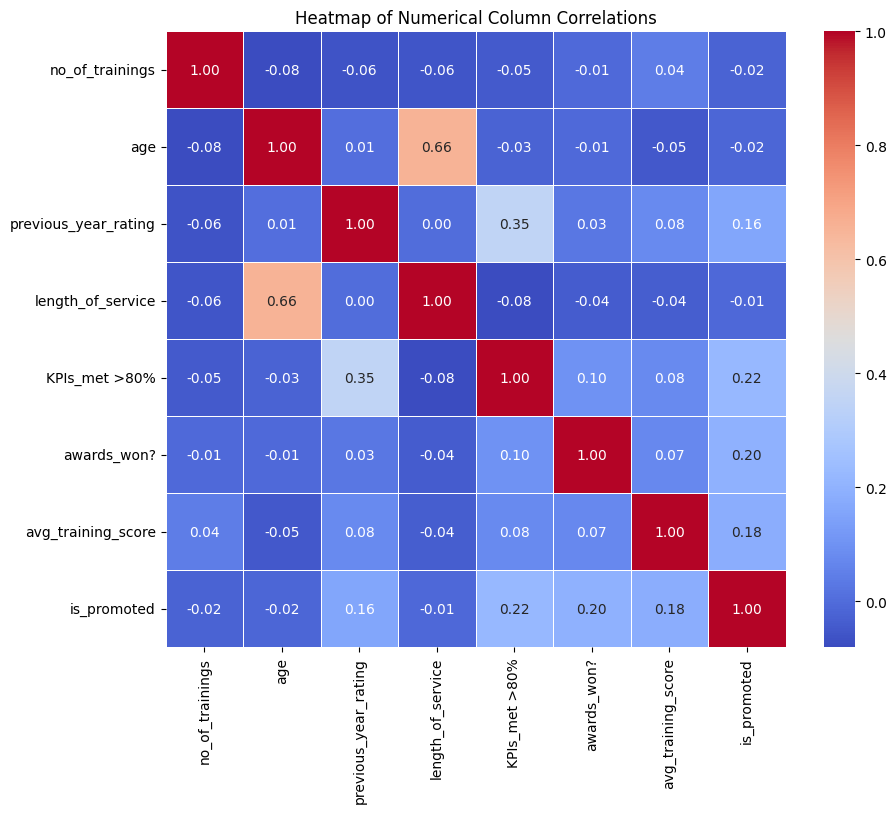

In [20]:
numerical_df = df_train.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix,
            annot=True,      # Show the correlation values on the heatmap
            cmap='coolwarm', # Color map (e.g., 'viridis', 'plasma', 'magma', 'cividis', 'coolwarm')
            fmt=".2f",       # Format annotations to two decimal places
            linewidths=.5)   # Add lines between cells
plt.title('Heatmap of Numerical Column Correlations')
plt.show()

# Data preprocessing

In [21]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [22]:
#dealing with missing values

df_train['education'].fillna(df_train['education'].mode()[0], inplace=True)
df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mode()[0], inplace=True)


<ipython-input-22-2d4804f456ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['education'].fillna(df_train['education'].mode()[0], inplace=True)
<ipython-input-22-2d4804f456ba>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [23]:
df_test['education'].fillna(df_test['education'].mode()[0], inplace=True)
df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].mode()[0], inplace=True)

<ipython-input-23-a3819f19b6a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['education'].fillna(df_test['education'].mode()[0], inplace=True)
<ipython-input-23-a3819f19b6a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [24]:
cols_to_encode = ['education'] #gender, region, department, recruitment channel (not relevant)

#df_encoded_cols = pd.get_dummies(df_train[cols_to_encode], drop_first=True) # drop_first avoids multicollinearity
#df_train = df_train.drop(columns=cols_to_encode)
#df_train = pd.concat([df_train, df_encoded_cols], axis=1)

#print(df_train.head())

df_train = pd.get_dummies(df_train, columns=cols_to_encode, drop_first=True)
df_test = pd.get_dummies(df_test, columns=cols_to_encode, drop_first=True)

df_train = pd.get_dummies(df_train, columns=['department'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['department'], drop_first=True)

df_train = pd.get_dummies(df_train, columns=['recruitment_channel'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['recruitment_channel'], drop_first=True)


In [25]:
df_train.columns

Index(['region', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'education_Below Secondary',
       'education_Master's & above', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [26]:
#dropping columns - gender, region, department, recruitment channel (not relevant)

df_train_cleaned = df_train.drop(columns=['gender', 'region'])
df_test_cleaned = df_test.drop(columns=['gender', 'region'])

In [27]:
df_copy = df_train_cleaned.copy()

In [28]:
df_train_cleaned.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,False,True,False,False,False,False,False,False,True,False,False,True
1,1,30,5.0,4,0,0,60,0,False,False,False,False,False,True,False,False,False,False,False,False
2,1,34,3.0,7,0,0,50,0,False,False,False,False,False,False,False,False,True,False,False,True
3,2,39,1.0,10,0,0,50,0,False,False,False,False,False,False,False,False,True,False,False,False
4,1,45,3.0,2,0,0,73,0,False,False,False,False,False,False,False,False,False,True,False,False


# Modelling

In [29]:
X = df_train_cleaned.drop('is_promoted', axis=1)
y = df_train_cleaned['is_promoted']

In [30]:
#splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
#columns to scale

cols_to_scale = ['age', 'no_of_trainings', 'avg_training_score', 'length_of_service']

#apply standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

df_test_cleaned[cols_to_scale] = scaler.transform(df_test_cleaned[cols_to_scale])

In [32]:
#applying logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lg_model = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']


}

# --- 4. Perform Grid Search Cross-Validation ---
print("Starting Grid Search for Logistic Regression...")
grid_search = GridSearchCV(estimator=lg_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

#model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Starting Grid Search for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.9334975369458128


In [33]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.96     10028\n           1       0.84      0.27      0.41       934\n\n    accuracy                           0.93     10962\n   macro avg       0.89      0.63      0.69     10962\nweighted avg       0.93      0.93      0.92     10962\n'

In [34]:
confusion_matrix(y_test, y_pred)

array([[9978,   50],
       [ 679,  255]])

In [35]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.4116222760290557

# KNN

In [36]:
#knn

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.9232804232804233
F1 Score: 0.31792376317923765


# SVM

In [37]:
#svm

from sklearn.svm import SVC

svm_model = SVC(random_state=42, kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred)
print(f1)

Accuracy: 0.9244663382594417
0.20384615384615384


# Decision Tree

In [38]:
X = df_copy.drop('is_promoted', axis=1)
y = df_copy['is_promoted']

In [39]:
#decision tree
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid_search_dt = GridSearchCV(estimator=decision_tree_model,
                              param_grid=param_grid_dt,
                              cv=5,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=2)

grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_

#decision_tree_model.fit(X_train, y_train)

y_pred = best_dt_model.predict(X_test)

# --- 4. Evaluate the Model ---
print("\n--- Decision Tree Model Evaluation ---")
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:.4f}")

f1 = f1_score(y_test, y_pred)
f1


Fitting 5 folds for each of 90 candidates, totalling 450 fits

--- Decision Tree Model Evaluation ---
Accuracy: 0.9267


0.4779220779220779

In [41]:
from sklearn.ensemble import BaggingClassifier
# ... (your X_train, y_train, X_test, y_test, and best_dt_model from previous tuning)

bagging_model_tuned_base = BaggingClassifier(
    estimator=best_dt_model, # Use your best, tuned Decision Tree here
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

bagging_model_tuned_base.fit(X_train, y_train)

y_pred = bagging_model_tuned_base.predict(X_test)

# --- 4. Evaluate the Model ---
print("\n--- Random Forest Model Evaluation ---")
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred)
f1


--- Random Forest Model Evaluation ---
Accuracy: 0.9410

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.89      0.35      0.50       934

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962


Confusion Matrix:
[[9989   39]
 [ 608  326]]


0.5019245573518091

In [42]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

# --- 4. Evaluate the Model ---
print("\n--- Random Forest Model Evaluation ---")
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred)
f1


--- Random Forest Model Evaluation ---
Accuracy: 0.9330

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10028
           1       0.71      0.36      0.48       934

    accuracy                           0.93     10962
   macro avg       0.83      0.67      0.72     10962
weighted avg       0.92      0.93      0.92     10962


Confusion Matrix:
[[9890  138]
 [ 596  338]]


0.4794326241134752

In [43]:
final_predictions = bagging_model_tuned_base.predict(df_test_cleaned)

In [44]:
new_data = pd.read_csv("/content/sample_submission_M0L0uXE.csv")


In [45]:
new_data['is_promoted'] = final_predictions

In [46]:
new_data.to_csv('output.csv', index=False)

In [47]:
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>